In [1]:
pkgs <- c("keras", "lime", "tidyquant", "rsample", "recipes", "yardstick", "corrr", "xgboost", "caret", "e1071", "mltools","skimr")
install.packages(pkgs)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘later’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘BH’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘RcppArmadillo’, ‘RcppRoll’, ‘listenv’, ‘parallelly’, ‘lava’, ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘shape’, ‘quadprog’, ‘zoo’, ‘plotly’, ‘padr’, ‘anytime’, ‘forecast’, ‘tsfeatures’, ‘future’, ‘globals’, ‘warp’, ‘prodlim’, ‘TSP’, ‘qap’, ‘gclus’, ‘ca’, ‘registry’, ‘iterators’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’, ‘glmnet’, ‘Rcpp’, ‘assertthat’, ‘gower’, ‘RcppEigen’, ‘PerformanceAnalytics’, ‘quantmod’, ‘lazyeval’, ‘Quandl’, ‘riingo’, ‘alphavantager’, ‘timetk’, ‘timeDate’, ‘TTR’, ‘xts’, ‘furrr’, ‘slider’, ‘clock’, ‘hardhat’, ‘ipred’, ‘ggrepel’, ‘seriation’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘reshape2’, ‘proxy’




In [2]:
library(keras)
library(lime)
library(tidyquant)
library(rsample)
library(recipes)
library(yardstick)
library(corrr)
library(dplyr)
library(xgboost)
library(caret)  
library(e1071) 
library(purrr)
library(data.table)
library(mltools)
library(skimr)


Loading required package: lubridate

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



################################### WARNING ###################################
# We noticed you have dplyr installed. The dplyr lag() function breaks how    #
# base R's lag() function is supposed to work, which breaks lag(my_xts).      #
#                                                                             #
# If you call library(dplyr) later in this session, then calls to lag(my_xts) #
# that you enter or source() into this session won't work correctly.          #
#                            

In [130]:
dataset <- read.csv(url("https://raw.githubusercontent.com/mikejbanks/UCI-Machine-Learning-Repository-Bank-Marketing/main/bank-full.csv"), header=TRUE, na.strings=c("", "NA"), sep = ";",stringsAsFactors=TRUE)

In importing the dataset, I have converted blanks to NAs, so I will not need to be concerned about them

In [131]:
dataset

age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no


In [132]:
sapply(dataset, function(x)all(is.na(x)))

age       job   marital education   default   balance   housing      loan 
    FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE 
  contact       day     month  duration  campaign     pdays  previous  poutcome 
    FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE     FALSE 
        y 
    FALSE

In [133]:
glimpse(dataset)

Rows: 45,211
Columns: 17
$ age       <int> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53, 58, 57, …
$ job       <fct> management, technician, entrepreneur, blue-collar, unknown, …
$ marital   <fct> married, single, married, married, single, married, single, …
$ education <fct> tertiary, secondary, secondary, unknown, unknown, tertiary, …
$ default   <fct> no, no, no, no, no, no, no, yes, no, no, no, no, no, no, no,…
$ balance   <int> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 71…
$ housing   <fct> yes, yes, yes, yes, no, yes, yes, yes, yes, yes, yes, yes, y…
$ loan      <fct> no, no, yes, no, no, no, yes, no, no, no, no, no, no, no, no…
$ contact   <fct> unknown, unknown, unknown, unknown, unknown, unknown, unknow…
$ day       <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ month     <fct> may, may, may, may, may, may, may, may, may, may, may, may, …
$ duration  <int> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517,…
$ campaign  <in

In [134]:

dataset %>% 
        map(is.na) %>%
        map(sum)

$age
[1] 0

$job
[1] 0

$marital
[1] 0

$education
[1] 0

$default
[1] 0

$balance
[1] 0

$housing
[1] 0

$loan
[1] 0

$contact
[1] 0

$day
[1] 0

$month
[1] 0

$duration
[1] 0

$campaign
[1] 0

$pdays
[1] 0

$previous
[1] 0

$poutcome
[1] 0

$y
[1] 0

Since there are no NAs in dataset, I can move forward

In [135]:
skim(dataset)

── Data Summary ────────────────────────
                           Values 
Name                       dataset
Number of rows             45211  
Number of columns          17     
_______________________           
Column type frequency:            
  factor                   10     
  numeric                  7      
________________________          
Group variables            None   

── Variable type: factor ───────────────────────────────────────────────────────
   skim_variable n_missing complete_rate ordered n_unique
 1 job                   0             1 FALSE         12
 2 marital               0             1 FALSE          3
 3 education             0             1 FALSE          4
 4 default               0             1 FALSE          2
 5 housing               0             1 FALSE          2
 6 loan                  0             1 FALSE          2
 7 contact               0             1 FALSE          3
 8 month                 0             1 FALSE         12
 9 po

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 15 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,factor,job,0,1,FALSE,12,"blu: 9732, man: 9458, tec: 7597, adm: 5171",NA,NA,NA,NA,NA,NA,NA,NA
2,factor,marital,0,1,FALSE,3,"mar: 27214, sin: 12790, div: 5207",NA,NA,NA,NA,NA,NA,NA,NA
3,factor,education,0,1,FALSE,4,"sec: 23202, ter: 13301, pri: 6851, unk: 1857",NA,NA,NA,NA,NA,NA,NA,NA
4,factor,default,0,1,FALSE,2,"no: 44396, yes: 815",NA,NA,NA,NA,NA,NA,NA,NA
5,factor,housing,0,1,FALSE,2,"yes: 25130, no: 20081",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,loan,0,1,FALSE,2,"no: 37967, yes: 7244",NA,NA,NA,NA,NA,NA,NA,NA
7,factor,contact,0,1,FALSE,3,"cel: 29285, unk: 13020, tel: 2906",NA,NA,NA,NA,NA,NA,NA,NA
8,factor,month,0,1,FALSE,12,"may: 13766, jul: 6895, aug: 6247, jun: 5341",NA,NA,NA,NA,NA,NA,NA,NA
9,factor,poutcome,0,1,FALSE,4,"unk: 36959, fai: 4901, oth: 1840, suc: 1511",NA,NA,NA,NA,NA,NA,NA,NA


In [136]:
sum(duplicated(dataset))

[1] 0

There are no duplicate rows that need to be removed

In [137]:
balanceOutliers <- subset(dataset, balance < -4000)  

In [138]:
balanceOutliers

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
,<int>,<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<int>,<int>,<fct>,<fct>
12910,26,blue-collar,single,secondary,yes,-8019,no,yes,cellular,7,jul,299,3,-1,0,unknown,no
15683,49,management,married,tertiary,yes,-6847,no,yes,cellular,21,jul,206,1,-1,0,unknown,no
38737,60,management,divorced,tertiary,no,-4057,yes,no,cellular,18,may,242,6,-1,0,unknown,no


Even though a balance for an account can be negative, I want to remove any strange outliers, so I will remove rows with balance less than -4000

In [139]:
dataset<-subset(dataset, balance > -4000) 

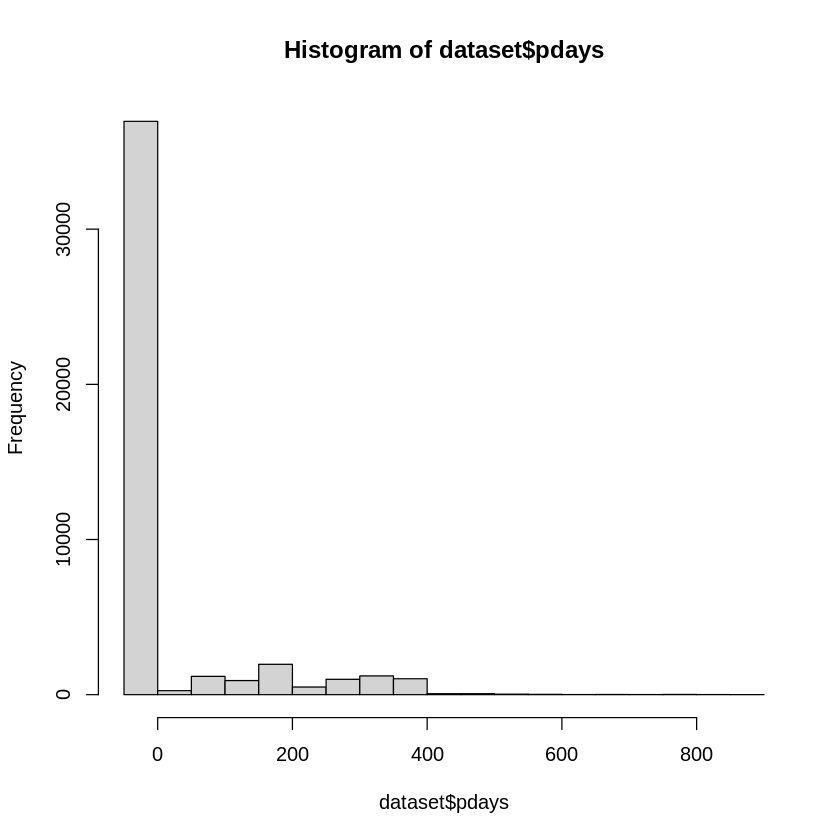

In [140]:
hist(dataset$pdays)

In [141]:
dataset$pdays[dataset$pdays == -1] <- 0

In [142]:
glimpse(dataset)

Rows: 45,208
Columns: 17
$ age       <int> 58, 44, 33, 47, 33, 35, 28, 42, 58, 43, 41, 29, 53, 58, 57, …
$ job       <fct> management, technician, entrepreneur, blue-collar, unknown, …
$ marital   <fct> married, single, married, married, single, married, single, …
$ education <fct> tertiary, secondary, secondary, unknown, unknown, tertiary, …
$ default   <fct> no, no, no, no, no, no, no, yes, no, no, no, no, no, no, no,…
$ balance   <int> 2143, 29, 2, 1506, 1, 231, 447, 2, 121, 593, 270, 390, 6, 71…
$ housing   <fct> yes, yes, yes, yes, no, yes, yes, yes, yes, yes, yes, yes, y…
$ loan      <fct> no, no, yes, no, no, no, yes, no, no, no, no, no, no, no, no…
$ contact   <fct> unknown, unknown, unknown, unknown, unknown, unknown, unknow…
$ day       <int> 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, …
$ month     <fct> may, may, may, may, may, may, may, may, may, may, may, may, …
$ duration  <int> 261, 151, 76, 92, 198, 139, 217, 380, 50, 55, 222, 137, 517,…
$ campaign  <in

pdays column had a large amount of -1 values meaning the client was not previously contacted. I changed the -1 values to 0 for better results

In [143]:
dataset$default<-ifelse(dataset$default=="yes",1,0)

In [144]:
dataset$housing<-ifelse(dataset$housing=="yes",1,0)

In [145]:
dataset$loan<-ifelse(dataset$loan=="yes",1,0)

In [146]:
dataset$y<-ifelse(dataset$y=="yes",1,0)

Changed "yes/no" to binary for default, housing, and loan features and for the target


In [147]:
skim(dataset)

── Data Summary ────────────────────────
                           Values 
Name                       dataset
Number of rows             45208  
Number of columns          17     
_______________________           
Column type frequency:            
  factor                   6      
  numeric                  11     
________________________          
Group variables            None   

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 job                   0             1 FALSE         12
2 marital               0             1 FALSE          3
3 education             0             1 FALSE          4
4 contact               0             1 FALSE          3
5 month                 0             1 FALSE         12
6 poutcome              0             1 FALSE          4
  top_counts                                  
1 blu: 9731, man: 9456, tec: 7597, adm: 5171  
2 mar: 27213, sin: 12789, div: 520

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 15 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,factor.ordered,factor.n_unique,factor.top_counts,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<lgl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,factor,job,0,1,FALSE,12,"blu: 9731, man: 9456, tec: 7597, adm: 5171",NA,NA,NA,NA,NA,NA,NA,NA
2,factor,marital,0,1,FALSE,3,"mar: 27213, sin: 12789, div: 5206",NA,NA,NA,NA,NA,NA,NA,NA
3,factor,education,0,1,FALSE,4,"sec: 23201, ter: 13299, pri: 6851, unk: 1857",NA,NA,NA,NA,NA,NA,NA,NA
4,factor,contact,0,1,FALSE,3,"cel: 29282, unk: 13020, tel: 2906",NA,NA,NA,NA,NA,NA,NA,NA
5,factor,month,0,1,FALSE,12,"may: 13765, jul: 6893, aug: 6247, jun: 5341",NA,NA,NA,NA,NA,NA,NA,NA
6,factor,poutcome,0,1,FALSE,4,"unk: 36956, fai: 4901, oth: 1840, suc: 1511",NA,NA,NA,NA,NA,NA,NA,NA
7,numeric,age,0,1,NA,NA,NA,4.093594e+01,10.6184357,18,33,39,48,95,▅▇▃▁▁
8,numeric,default,0,1,NA,NA,NA,1.798354e-02,0.1328929,0,0,0,0,1,▇▁▁▁▁
9,numeric,balance,0,1,NA,NA,NA,1.362781e+03,3044.1955802,-3372,72,448,1428,102127,▇▁▁▁▁


In [148]:
dataset2 <- as.data.table(dataset)
dataset3<-one_hot(dataset2,cols = "auto")

In [149]:
skim(dataset3)

── Data Summary ────────────────────────
                           Values  
Name                       dataset3
Number of rows             45208   
Number of columns          49      
Key                        NULL    
_______________________            
Column type frequency:             
  numeric                  49      
________________________           
Group variables            None    

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable       n_missing complete_rate       mean        sd    p0 p25
 1 age                         0             1   40.9       10.6       18  33
 2 job_admin.                  0             1    0.114      0.318      0   0
 3 job_blue-collar             0             1    0.215      0.411      0   0
 4 job_entrepreneur            0             1    0.0329     0.178      0   0
 5 job_housemaid               0             1    0.0274     0.163      0   0
 6 job_management              0             1   

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 12 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,numeric,age,0,1,4.093594e+01,1.061844e+01,18,33,39,48,95,▅▇▃▁▁
2,numeric,job_admin.,0,1,1.143824e-01,3.182787e-01,0,0,0,0,1,▇▁▁▁▁
3,numeric,job_blue-collar,0,1,2.152495e-01,4.109999e-01,0,0,0,0,1,▇▁▁▁▂
4,numeric,job_entrepreneur,0,1,3.289241e-02,1.783569e-01,0,0,0,0,1,▇▁▁▁▁
5,numeric,job_housemaid,0,1,2.742877e-02,1.633310e-01,0,0,0,0,1,▇▁▁▁▁
6,numeric,job_management,0,1,2.091665e-01,4.067180e-01,0,0,0,0,1,▇▁▁▁▂
7,numeric,job_retired,0,1,5.007963e-02,2.181117e-01,0,0,0,0,1,▇▁▁▁▁
8,numeric,job_self-employed,0,1,3.492745e-02,1.835981e-01,0,0,0,0,1,▇▁▁▁▁
9,numeric,job_services,0,1,9.188639e-02,2.888687e-01,0,0,0,0,1,▇▁▁▁▁


In [150]:
dataset4<-as.data.frame(dataset3)
minmax <- function(x){(x-min(x))/(max(x)-min(x))}
dataset4[c("previous","age","balance","day","duration","campaign","pdays")] <- lapply(dataset4[c("previous","age","balance","day","duration","campaign","pdays")], minmax)

Scaled Features

In [151]:
skim(dataset4)

── Data Summary ────────────────────────
                           Values  
Name                       dataset4
Number of rows             45208   
Number of columns          49      
_______________________            
Column type frequency:             
  numeric                  49      
________________________           
Group variables            None    

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable       n_missing complete_rate    mean      sd p0    p25    p50
 1 age                         0             1 0.298   0.138    0 0.195  0.273 
 2 job_admin.                  0             1 0.114   0.318    0 0      0     
 3 job_blue-collar             0             1 0.215   0.411    0 0      0     
 4 job_entrepreneur            0             1 0.0329  0.178    0 0      0     
 5 job_housemaid               0             1 0.0274  0.163    0 0      0     
 6 job_management              0             1 0.209   0.407    0 0      

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 12 > 1' in coercion to 'logical(1)'”


,skim_type,skim_variable,n_missing,complete_rate,numeric.mean,numeric.sd,numeric.p0,numeric.p25,numeric.p50,numeric.p75,numeric.p100,numeric.hist
,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,numeric,age,0,1,0.297869358,0.13790176,0,0.19480519,0.27272727,0.38961039,1,▅▇▃▁▁
2,numeric,job_admin.,0,1,0.114382410,0.31827868,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▁
3,numeric,job_blue-collar,0,1,0.215249513,0.41099987,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▂
4,numeric,job_entrepreneur,0,1,0.032892408,0.17835695,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▁
5,numeric,job_housemaid,0,1,0.027428774,0.16333103,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▁
6,numeric,job_management,0,1,0.209166519,0.40671802,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▂
7,numeric,job_retired,0,1,0.050079632,0.21811170,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▁
8,numeric,job_self-employed,0,1,0.034927446,0.18359811,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▁
9,numeric,job_services,0,1,0.091886392,0.28886870,0,0.00000000,0.00000000,0.00000000,1,▇▁▁▁▁


In [152]:
sample <- sample(c(TRUE, FALSE), nrow(dataset4), replace=TRUE, prob=c(0.7,0.3))
train  <- dataset4[sample, ]
test   <- dataset4[!sample, ]

In [153]:
train

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,⋯,month_sep,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<dbl>
1,0.51948052,0,0,0,0,1,0,0,0,0,⋯,0,0.05307035,0.00000000,0,0,0,0,0,1,0
2,0.33766234,0,0,0,0,0,0,0,0,0,⋯,0,0.03070354,0.00000000,0,0,0,0,0,1,0
4,0.37662338,0,1,0,0,0,0,0,0,0,⋯,0,0.01870679,0.00000000,0,0,0,0,0,1,0
5,0.19480519,0,0,0,0,0,0,0,0,0,⋯,0,0.04026027,0.00000000,0,0,0,0,0,1,0
6,0.22077922,0,0,0,0,1,0,0,0,0,⋯,0,0.02826352,0.00000000,0,0,0,0,0,1,0
7,0.12987013,0,0,0,0,1,0,0,0,0,⋯,0,0.04412363,0.00000000,0,0,0,0,0,1,0
8,0.31168831,0,0,1,0,0,0,0,0,0,⋯,0,0.07726718,0.00000000,0,0,0,0,0,1,0
9,0.51948052,0,0,0,0,0,1,0,0,0,⋯,0,0.01016673,0.00000000,0,0,0,0,0,1,0
10,0.32467532,0,0,0,0,0,0,0,0,0,⋯,0,0.01118341,0.00000000,0,0,0,0,0,1,0


In [154]:
y_train<-train[c(49)]

In [155]:
train <- train [1: ncol(train)-1 ]

In [156]:
y_test<-test[c(49)]

In [157]:
test <- test [1: ncol(train)-1 ]
test

,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,⋯,month_nov,month_oct,month_sep,duration,campaign,pdays,previous,poutcome_failure,poutcome_other,poutcome_success
,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
3,0.1948052,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0.015453436,0,0,0,0,0,0
11,0.2987013,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0.045140301,0,0,0,0,0,0
15,0.5064935,0,0,0,0,0,0,0,1,0,⋯,0,0,0,0.035380236,0,0,0,0,0,0
16,0.4285714,0,0,0,0,0,1,0,0,0,⋯,0,0,0,0.071777145,0,0,0,0,0,0
18,0.5064935,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0.007726718,0,0,0,0,0,0
21,0.1298701,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0.053273688,0,0,0,0,0,0
22,0.4935065,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0.033346889,0,0,0,0,0,0
28,0.4415584,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0.025823505,0,0,0,0,0,0
32,0.4025974,0,0,0,0,1,0,0,0,0,⋯,0,0,0,0.046766978,0,0,0,0,0,0


In [158]:
xgboost_train = xgb.DMatrix(data=as.matrix(train), label=as.matrix(y_train))
xgboost_test = xgb.DMatrix(data=as.matrix(test), label=as.matrix(y_test))

In [159]:
model <- xgboost(data = xgboost_train,                       
                 max.depth=7,                           
                 nrounds=1500)                              

summary(model)  

[1]	train-rmse:0.395058 
[2]	train-rmse:0.329940 
[3]	train-rmse:0.290498 
[4]	train-rmse:0.268031 
[5]	train-rmse:0.253417 
[6]	train-rmse:0.244798 
[7]	train-rmse:0.237992 
[8]	train-rmse:0.233643 
[9]	train-rmse:0.230327 
[10]	train-rmse:0.227725 
[11]	train-rmse:0.225192 
[12]	train-rmse:0.223646 
[13]	train-rmse:0.221621 
[14]	train-rmse:0.219847 
[15]	train-rmse:0.218376 
[16]	train-rmse:0.215763 
[17]	train-rmse:0.214572 
[18]	train-rmse:0.214074 
[19]	train-rmse:0.212009 
[20]	train-rmse:0.211455 
[21]	train-rmse:0.210015 
[22]	train-rmse:0.208707 
[23]	train-rmse:0.208581 
[24]	train-rmse:0.208318 
[25]	train-rmse:0.206858 
[26]	train-rmse:0.206543 
[27]	train-rmse:0.205480 
[28]	train-rmse:0.204474 
[29]	train-rmse:0.202851 
[30]	train-rmse:0.201490 
[31]	train-rmse:0.200728 
[32]	train-rmse:0.200195 
[33]	train-rmse:0.200002 
[34]	train-rmse:0.199447 
[35]	train-rmse:0.198859 
[36]	train-rmse:0.198123 
[37]	train-rmse:0.197925 
[38]	train-rmse:0.196340 
[39]	train-rmse:0.195

               Length  Class              Mode       
handle               1 xgb.Booster.handle externalptr
raw            9278245 -none-             raw        
niter                1 -none-             numeric    
evaluation_log       2 data.table         list       
call                14 -none-             call       
params               2 -none-             list       
callbacks            2 -none-             list       
feature_names       48 -none-             character  
nfeatures            1 -none-             numeric    

In [160]:
colnames(xgboost_test) <- NULL
pred_test = predict(model, xgboost_test, strict_shape = TRUE)
pred_test 

0.009634494,0.01103521,-0.02145522,0.01198581,-0.002864382,0.07723404,0.01588853,0.08057114,0.03305484,-0.01474111,⋯,0.3443314,0.5513527,0.971248,0.9209237,0.09346754,0.842015,0.4046613,0.07323949,0.1354339,0.02540107


In [161]:
pred_test2 <-  as.numeric(pred_test > 0.5)

In [162]:
confusionMatrix(factor(pred_test2),factor(as.matrix(y_test)))

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 11501   846
         1   481   772
                                          
               Accuracy : 0.9024          
                 95% CI : (0.8973, 0.9074)
    No Information Rate : 0.881           
    P-Value [Acc > NIR] : 1.316e-15       
                                          
                  Kappa : 0.4842          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9599          
            Specificity : 0.4771          
         Pos Pred Value : 0.9315          
         Neg Pred Value : 0.6161          
             Prevalence : 0.8810          
         Detection Rate : 0.8457          
   Detection Prevalence : 0.9079          
      Balanced Accuracy : 0.7185          
                                          
       'Positive' Class : 0               
                  

In [163]:
importance_matrix = xgb.importance(colnames(xgboost_train), model = model)
importance_matrix

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
duration,0.3322053746,3.076972e-01,1.884283e-01
balance,0.1001010048,3.339880e-01,1.920527e-01
poutcome_success,0.0940835409,7.190764e-03,2.435541e-03
age,0.0901936573,7.679204e-02,1.702897e-01
day,0.0706065674,4.782120e-02,8.953708e-02
pdays,0.0427056762,6.317343e-02,3.496446e-02
campaign,0.0228423313,1.897184e-02,3.486538e-02
housing,0.0179582000,5.520745e-03,1.642132e-02
month_apr,0.0175123316,6.982238e-03,1.209514e-02
